In [2]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Loading & Exploring the given Data**

In [3]:
flipkart = pd.read_csv('flipkart.csv')

In [4]:
flipkart

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [5]:
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
flipkart.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
flipkart.isnull()
#checking for any null values

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
subset= flipkart[['uniq_id','pid','description']]

In [9]:
subset.head()

,uniq_id,pid,description
0,c2d766ca982eca8304150849735ffef9,SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...
1,7f7036a6d550aaa89d34c77bd39a5e48,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,SRTEH2F6HUZMQ6SJ,Key Features of Alisha Solid Women's Cycling S...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...


In [10]:
flipkart.loc[90]
#calling for first 90 rows in dataset

uniq_id                                     7698cd2c78a1fd6105ef617445da52f9
crawl_timestamp                                    2015-12-04 07:25:36 +0000
product_url                http://www.flipkart.com/aries-gold-g-729-s-bk-...
product_name               Aries Gold G 729 S-BK Analog Watch  - For Men,...
product_category_tree      ["Watches >> Wrist Watches >> Aries Gold Wrist...
pid                                                         WATECJ25SP6A7VD5
retail_price                                                           13699
discounted_price                                                       13099
image                      ["http://img6a.flixcart.com/image/watch/v/d/5/...
is_FK_Advantage_product                                                False
description                Aries Gold G 729 S-BK Analog Watch  - For Men,...
product_rating                                           No rating available
overall_rating                                           No rating available

In [11]:
flipkart.product_category_tree

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object

In [12]:
type(flipkart)

pandas.core.frame.DataFrame

In [13]:
type(flipkart.crawl_timestamp) 

pandas.core.series.Series

In [14]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [15]:
flipkart=flipkart[flipkart['product_category_tree'].str.contains('>>')] 
#discarding all the values that does not contain any primary category due to lack of data by checking for ">>"
flipkart

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [16]:
flipkart['product_category_tree'].str.split('>>',expand=True)

,0,1,2,3,4,5,6,7
0,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]",None,None
1,"[""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,None,None,None,None
2,"[""Footwear",Women's Footwear,Ballerinas,"AW Bellies""]",None,None,None,None
3,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]",None,None
4,"[""Pet Supplies",Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""]",None,None,None
...,...,...,...,...,...,...,...,...
19995,"[""Baby Care",Baby & Kids Gifts,Stickers,"WallDesign Stickers""]",None,None,None,None
19996,"[""Baby Care",Baby & Kids Gifts,Stickers,"Wallmantra Stickers""]",None,None,None,None
19997,"[""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""]",None,None,None,None
19998,"[""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""]",None,None,None,None


In [17]:
#converting crawl_timestamp column from string type to datetime type
flipkart['crawl_timestamp'] = pd.to_datetime(flipkart['crawl_timestamp'])

In [18]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19672 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  19672 non-null  object             
 1   crawl_timestamp          19672 non-null  datetime64[ns, UTC]
 2   product_url              19672 non-null  object             
 3   product_name             19672 non-null  object             
 4   product_category_tree    19672 non-null  object             
 5   pid                      19672 non-null  object             
 6   retail_price             19597 non-null  float64            
 7   discounted_price         19597 non-null  float64            
 8   image                    19669 non-null  object             
 9   is_FK_Advantage_product  19672 non-null  bool               
 10  description              19670 non-null  object             
 11  product_rating           196

**Handling any Missing Values**

In [19]:
bool_series =pd.isnull(flipkart['brand'])
#checking for any null values in brand column as it contains most amount of null values

In [23]:
flipkart[bool_series]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
25,bb41283056536d7af11e994ba4f9db81,2016-01-03 20:56:50+00:00,http://www.flipkart.com/glus-wedding-lingerie-...,Glus Wedding Lingerie Set,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",LINE92U9KGZG25AY,1299.0,699.0,"[""http://img5a.flixcart.com/image/lingerie-set...",False,Glus Wedding Lingerie Set - Buy Turquoise Glus...,No rating available,No rating available,No Brand,"{""product_specification""=>[{""key""=>""Number of ..."
26,ea91e47cac68b132887d7fc1175e91c2,2016-01-03 20:56:50+00:00,http://www.flipkart.com/veelys-shiny-white-qua...,Veelys Shiny White Quad Roller Skates - Size 4...,"[""Sports & Fitness >> Other Sports >> Skating ...",SKTEC88WSNYJKWY7,3199.0,2499.0,"[""http://img6a.flixcart.com/image/skate/w/y/7/...",False,Veelys Shiny White Quad Roller Skates - Size 4...,No rating available,No rating available,No Brand,"{""product_specification""=>[{""key""=>""Playing Le..."
27,bec784ef794cf596dbe2cbbaf5427ef0,2016-01-03 20:56:50+00:00,http://www.flipkart.com/bulaky-vanity-case-jew...,Bulaky vanity case Jewellery Vanity Case,"[""Beauty and Personal Care >> Makeup >> Vanity...",VANDZY4YZFPEG85T,499.0,390.0,"[""http://img6a.flixcart.com/image/vanity-box/8...",False,Buy Bulaky vanity case Jewellery Vanity Case f...,3,3,No Brand,"{""product_specification""=>{""key""=>""Body Materi..."
28,171e0bcea390c17fd70e3ffa6c2cd187,2016-01-03 20:56:50+00:00,http://www.flipkart.com/fdt-women-s-leggings/p...,FDT Women's Leggings,"[""Clothing >> Women's Clothing >> Fusion Wear ...",LJGEB2KMCMMHHFC7,699.0,309.0,"[""http://img6a.flixcart.com/image/legging-jegg...",False,FDT Women's Leggings - Buy Parrot Green FDT Wo...,No rating available,No rating available,No Brand,"{""product_specification""=>[{""key""=>""Number of ..."
29,a60ebb7803c6a31795de3f8949cb6f98,2016-01-03 20:56:50+00:00,http://www.flipkart.com/madcaps-c38gr30-men-s-...,Madcaps C38GR30 Men's Cargos,"[""Clothing >> Men's Clothing >> Cargos, Shorts...",CRGE6A53UX7CJMXX,2199.0,1699.0,"[""http://img5a.flixcart.com/image/cargo/n/g/h/...",False,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,No rating available,No rating available,No Brand,"{""product_specification""=>[{""key""=>""Number of ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19936,33b347833631a5040957c7c4b81f7ad7,2015-12-01 10:15:43+00:00,http://www.flipkart.com/purple-women-heels/p/i...,Purple Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEY8UH5TZ2AJCK,1099.0,899.0,"[""http://img6a.flixcart.com/image/sandal/u/9/w...",False,Flipkart.com: Buy Purple Women Heels only for ...,2,2,No Brand,"{""product_specification""=>[{""key""=>""Occasion"",..."
19941,618ee8f01d3d2f74a2d6bb7e3040dfc0,2015-12-01 10:15:43+00:00,http://www.flipkart.com/pinq-chiq-women-heels/...,Pinq Chiq Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEYPKYZ47RUKSX,1099.0,769.0,"[""http://img5a.flixcart.com/image/sandal/z/s/q...",False,Flipkart.com: Buy Pinq Chiq Women Heels only f...,No rating available,No rating available,No Brand,"{""product_specification""=>[{""key""=>""Ideal For""..."
19953,77226646cd475e6e90954820197f8cac,2015-12-01 10:15:43+00:00,http://www.flipkart.com/la-isla-women-heels/p/...,La Isla Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEY7QPH3YZFQYW,2599.0,779.0,"[""http://img6a.flixcart.com/image/sandal/w/h/6...",False,Flipkart.com: Buy La Isla Women Heels only for...,No rating available,No rating available,No Brand,"{""product_specification""=>[{""key""=>""Ideal For""..."
19958,fb1ed40dd636c9eb3f8ccb281a04558d,2015-12-01 10:15:43+00:00,http://www.flipkart.com/witches-comfy-hues-wom...,We Witches Comfy Hues Women Wedges,"[""Footwear >> Women's Footwear >> Wedges""]",SNDDX969ZZJJKSHB,899.0,899.0,"[""http://img5a.flixcart.com/image/sandal/m/y/z...",False,Flipkart.com: Buy

In [21]:
#filling all the null values in brand column with fillna
flipkart['brand'].fillna('No Brand',inplace=True)

In [22]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19672 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  19672 non-null  object             
 1   crawl_timestamp          19672 non-null  datetime64[ns, UTC]
 2   product_url              19672 non-null  object             
 3   product_name             19672 non-null  object             
 4   product_category_tree    19672 non-null  object             
 5   pid                      19672 non-null  object             
 6   retail_price             19597 non-null  float64            
 7   discounted_price         19597 non-null  float64            
 8   image                    19669 non-null  object             
 9   is_FK_Advantage_product  19672 non-null  bool               
 10  description              19670 non-null  object             
 11  product_rating           196

In [24]:
#dropping any rows that contains null values as that would not cause lot of data loss
flipkart=flipkart.dropna(axis=0,how='any')

In [25]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19580 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  19580 non-null  object             
 1   crawl_timestamp          19580 non-null  datetime64[ns, UTC]
 2   product_url              19580 non-null  object             
 3   product_name             19580 non-null  object             
 4   product_category_tree    19580 non-null  object             
 5   pid                      19580 non-null  object             
 6   retail_price             19580 non-null  float64            
 7   discounted_price         19580 non-null  float64            
 8   image                    19580 non-null  object             
 9   is_FK_Advantage_product  19580 non-null  bool               
 10  description              19580 non-null  object             
 11  product_rating           195

In [26]:
#dropping any duplicates
flipkart=flipkart.drop_duplicates()

In [27]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19580 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  19580 non-null  object             
 1   crawl_timestamp          19580 non-null  datetime64[ns, UTC]
 2   product_url              19580 non-null  object             
 3   product_name             19580 non-null  object             
 4   product_category_tree    19580 non-null  object             
 5   pid                      19580 non-null  object             
 6   retail_price             19580 non-null  float64            
 7   discounted_price         19580 non-null  float64            
 8   image                    19580 non-null  object             
 9   is_FK_Advantage_product  19580 non-null  bool               
 10  description              19580 non-null  object             
 11  product_rating           195

In [28]:
#splitting the product category tree by using ">>" character as the identifier
product_category_split = flipkart['product_category_tree'].str.split('>>')

In [29]:
product_category_split

0        [["Clothing ,  Women's Clothing ,  Lingerie, S...
1        [["Furniture ,  Living Room Furniture ,  Sofa ...
2        [["Footwear ,  Women's Footwear ,  Ballerinas ...
3        [["Clothing ,  Women's Clothing ,  Lingerie, S...
4        [["Pet Supplies ,  Grooming ,  Skin & Coat Car...
                               ...                        
19995    [["Baby Care ,  Baby & Kids Gifts ,  Stickers ...
19996    [["Baby Care ,  Baby & Kids Gifts ,  Stickers ...
19997    [["Baby Care ,  Baby & Kids Gifts ,  Stickers ...
19998    [["Baby Care ,  Baby & Kids Gifts ,  Stickers ...
19999    [["Baby Care ,  Baby & Kids Gifts ,  Stickers ...
Name: product_category_tree, Length: 19580, dtype: object

In [30]:
#storing the sub categories in levels
flipkart['product_primary_category'] = product_category_split.str.get(0)
flipkart['level_2_category'] = product_category_split.str.get(1)
flipkart['level_3_category'] = product_category_split.str.get(2)
flipkart['level_4_category'] = product_category_split.str.get(3)
flipkart['level_5_category'] = product_category_split.str.get(4)
flipkart['level_6_category'] = product_category_split.str.get(5)
flipkart['level_7_category'] = product_category_split.str.get(6)
flipkart['level_8_category'] = product_category_split.str.get(7)

In [31]:
type(product_category_split[0][0])

str

In [32]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19580 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   uniq_id                   19580 non-null  object             
 1   crawl_timestamp           19580 non-null  datetime64[ns, UTC]
 2   product_url               19580 non-null  object             
 3   product_name              19580 non-null  object             
 4   product_category_tree     19580 non-null  object             
 5   pid                       19580 non-null  object             
 6   retail_price              19580 non-null  float64            
 7   discounted_price          19580 non-null  float64            
 8   image                     19580 non-null  object             
 9   is_FK_Advantage_product   19580 non-null  bool               
 10  description               19580 non-null  object             
 11  product_rating 

In [33]:
#deleting some sub categories due to lack of data
del flipkart['level_5_category']
del flipkart['level_6_category']
del flipkart['level_7_category']
del flipkart['level_8_category']

In [34]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19580 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   uniq_id                   19580 non-null  object             
 1   crawl_timestamp           19580 non-null  datetime64[ns, UTC]
 2   product_url               19580 non-null  object             
 3   product_name              19580 non-null  object             
 4   product_category_tree     19580 non-null  object             
 5   pid                       19580 non-null  object             
 6   retail_price              19580 non-null  float64            
 7   discounted_price          19580 non-null  float64            
 8   image                     19580 non-null  object             
 9   is_FK_Advantage_product   19580 non-null  bool               
 10  description               19580 non-null  object             
 11  product_rating 

In [35]:
#filling any missing values in subcategories that are remaining
flipkart['level_2_category'].fillna('Not available',inplace=True)
flipkart['level_3_category'].fillna('Not available',inplace=True)
flipkart['level_4_category'].fillna('Not available',inplace=True)

In [36]:
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_primary_category,level_2_category,level_3_category,level_4_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...","[""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...","[""Footwear",Women's Footwear,Ballerinas,"AW Bellies""]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...","[""Pet Supplies",Grooming,Skin & Coat Care,Shampoo


In [37]:
flipkart.describe()

,retail_price,discounted_price
count,19580.000000,19580.000000
mean,3001.422983,1989.292339
std,9082.385310,7393.609359
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [38]:
#removing the "[''" characters from starting of product_primary_category
index_r = 'product_primary_category'
flipkart[index_r] = flipkart[index_r].str[2:]

In [39]:
flipkart.product_primary_category.values

array(['Clothing ', 'Furniture ', 'Footwear ', ..., 'Baby Care ',
       'Baby Care ', 'Baby Care '], dtype=object)

In [40]:
#removing commas
index_r1 = 'description'
flipkart[index_r1] = flipkart[index_r1].str.replace(',', ' ')

In [42]:
import nltk

In [43]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

**Cleaning the description column in data**

In [44]:
#removing all puntuation in description by using already stored punctuations in string library
import string
string.punctuation

def remove_punctuation(txt):
    text_nopunct= "".join([c for c in txt if c not in string.punctuation])
    return text_nopunct

flipkart['description_nopunct']=flipkart['description'].apply(lambda x:remove_punctuation(x))
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_primary_category,level_2_category,level_3_category,level_4_category,description_nopunct
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Key Features of Alisha Solid Womens Cycling Sh...
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,FabHomeDecor Fabric Double Sofa Bed Finish Col...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas,"AW Bellies""]",Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Key Features of Alisha Solid Womens Cycling Sh...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Specifications of Sicons All Purpose Arnica Do...


In [45]:
"""tokenizing-converting sentences into seperate words after
each space called tokens .ie. splitting the sentences into words
so they can be further converted into numbers and stored in vectors for prediction"""
import re

def tokenize(txt):
    tokens=re.split('\W',txt)
    return tokens

flipkart['description_tokenized']=flipkart['description_nopunct'].apply(lambda x: tokenize(x.lower()))
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,product_primary_category,level_2_category,level_3_category,level_4_category,description_nopunct,description_tokenized
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Key Features of Alisha Solid Womens Cycling Sh...,"[key, features, of, alisha, solid, womens, cyc..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,FabHomeDecor Fabric Double Sofa Bed Finish Col...,"[fabhomedecor, fabric, double, sofa, bed, fini..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas,"AW Bellies""]",Key Features of AW Bellies Sandals Wedges Heel...,"[key, features, of, aw, bellies, sandals, wedg..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Key Features of Alisha Solid Womens Cycling Sh...,"[key, features, of, alisha, solid, womens, cyc..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[specifications, of, sicons, all, purpose, arn..."


In [46]:
#using in built library nltk stopwords 
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
#removing all the stop words like "'me', 'my', 'myself', 'we', 'our'" as they dont play much role in prediction
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
def remove_stopwords(txt_tokenize):
    filtered_text=[word for word in txt_tokenize if word not in stop_words]
    return filtered_text

flipkart['description_no_sw']=flipkart['description_tokenized'].apply(lambda x : remove_stopwords(x))
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,product_primary_category,level_2_category,level_3_category,level_4_category,description_nopunct,description_tokenized,description_no_sw
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Key Features of Alisha Solid Womens Cycling Sh...,"[key, features, of, alisha, solid, womens, cyc...","[key, features, alisha, solid, womens, cycling..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,FabHomeDecor Fabric Double Sofa Bed Finish Col...,"[fabhomedecor, fabric, double, sofa, bed, fini...","[fabhomedecor, fabric, double, sofa, bed, fini..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas,"AW Bellies""]",Key Features of AW Bellies Sandals Wedges Heel...,"[key, features, of, aw, bellies, sandals, wedg...","[key, features, aw, bellies, sandals, wedges, ..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Key Features of Alisha Solid Womens Cycling Sh...,"[key, features, of, alisha, solid, womens, cyc...","[key, features, alisha, solid, womens, cycling..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[specifications, of, sicons, all, purpose, arn...","[specifications, sicons, purpose, arnica, dog,..."


In [48]:
wn=nltk.WordNetLemmatizer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [49]:
"""lemmatizing data which will group together some words with 
similar meaning .eg. "coder","coding","code" will all be converted to "code" 
which will make it easy for the ML classifier"""
wn=nltk.WordNetLemmatizer()
ps=nltk.PorterStemmer()

def lemmatization(txt):
    text=[wn.lemmatize(word) for word in txt]
    return text

flipkart['description_lemmatized']=flipkart['description_no_sw'].apply(lambda x: lemmatization(x))
flipkart.description_lemmatized.values

array([list(['key', 'feature', 'alisha', 'solid', 'woman', 'cycling', 'short', 'cotton', 'lycra', 'navy', '', 'red', '', 'navy', 'specification', 'alisha', 'solid', 'woman', 'cycling', 'short', 'short', 'detail', 'number', 'content', 'sale', 'package', 'pack', '3', 'fabric', 'cotton', 'lycra', 'type', 'cycling', 'short', 'general', 'detail', 'pattern', 'solid', 'ideal', 'woman', 'fabric', 'care', 'gentle', 'machine', 'wash', 'lukewarm', 'water', '', 'bleach', 'additional', 'detail', 'style', 'code', 'altht3p21', 'box', '3', 'short']),
       list(['fabhomedecor', 'fabric', 'double', 'sofa', 'bed', 'finish', 'color', '', 'leatherette', 'black', 'mechanism', 'type', '', 'pull', 'price', 'r', '22', '646', '', '', 'fine', 'deep', 'seating', 'experience', '', '', 'save', 'space', 'new', 'click', 'clack', 'sofa', 'bed', '', '', 'easy', 'fold', 'vice', 'versa', 'simple', 'click', 'clack', 'mechanism', '', '', 'chrome', 'leg', 'mango', 'wood', 'frame', 'long', 'term', 'durability', '', '', 'do

In [50]:
#defining seperate function for data cleaning for ease
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+',txt)
    txt = [ps.stem(word) for word in tokens if word not in stop_words]
    return txt

**Data Preprocessing**

In [51]:
"""appling skit-learn TfidfVectorizer on description column  
to transform text into a meaningful representation of numbers 
which is used to fit machine learning algorithm for prediction as
machine does not understand string data"""

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack
tfidf = TfidfVectorizer(analyzer=clean_text)
data_sample=flipkart[0:5000]
#taking sample data as it will be very costly on my RAM and as i was facing memory error
x= tfidf.fit_transform(data_sample['description'])
print(x.shape)

(5000, 10100)


In [52]:
df=pd.DataFrame(x.toarray(),columns=tfidf.get_feature_names())
df.head()

,,0,00,000,00032nl,0008m,001,0010m,0011m,0012,...,zoysia,zps290,zte,zuhi,zunia,zw101,zw111,zyaden,¾,â
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#checking for all unique categories
df1=pd.DataFrame(flipkart['product_primary_category'].value_counts())
df1.head(32)

,product_primary_category
Clothing,6167
Jewellery,3521
Footwear,1223
Mobiles & Accessories,1096
Automotive,1010
Home Decor & Festive Needs,925
Beauty and Personal Care,708
Home Furnishing,698
Kitchen & Dining,645
Computers,573


In [54]:
flipkart.loc[:,['product_primary_category','retail_price','retail_price']].values

array([['Clothing ', 999.0, 999.0],
       ['Furniture ', 32157.0, 32157.0],
       ['Footwear ', 999.0, 999.0],
       ...,
       ['Baby Care ', 1299.0, 1299.0],
       ['Baby Care ', 1499.0, 1499.0],
       ['Baby Care ', 1499.0, 1499.0]], dtype=object)

In [55]:
"""applying OneHotEncoder on primary product category and then transforming to using numpy array
-so that each category could be uniquely coded with 0s and 1s"""
y=flipkart.loc[:,['product_primary_category','retail_price','retail_price']].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
y=np.array(ct.fit_transform(y))
print(y)

  (0, 6)	1.0
  (0, 32)	999.0
  (0, 33)	999.0
  (1, 11)	1.0
  (1, 32)	32157.0
  (1, 33)	32157.0
  (2, 10)	1.0
  (2, 32)	999.0
  (2, 33)	999.0
  (3, 6)	1.0
  (3, 32)	699.0
  (3, 33)	699.0
  (4, 24)	1.0
  (4, 32)	220.0
  (4, 33)	220.0
  (5, 6)	1.0
  (5, 32)	1199.0
  (5, 33)	1199.0
  (6, 11)	1.0
  (6, 32)	32157.0
  (6, 33)	32157.0
  (7, 10)	1.0
  (7, 32)	699.0
  (7, 33)	699.0
  (8, 6)	1.0
  :	:
  (19571, 33)	1220.0
  (19572, 2)	1.0
  (19572, 32)	999.0
  (19572, 33)	999.0
  (19573, 2)	1.0
  (19573, 32)	1299.0
  (19573, 33)	1299.0
  (19574, 2)	1.0
  (19574, 32)	727.0
  (19574, 33)	727.0
  (19575, 2)	1.0
  (19575, 32)	1500.0
  (19575, 33)	1500.0
  (19576, 2)	1.0
  (19576, 32)	1429.0
  (19576, 33)	1429.0
  (19577, 2)	1.0
  (19577, 32)	1299.0
  (19577, 33)	1299.0
  (19578, 2)	1.0
  (19578, 32)	1499.0
  (19578, 33)	1499.0
  (19579, 2)	1.0
  (19579, 32)	1499.0
  (19579, 33)	1499.0


**Data Visualization**

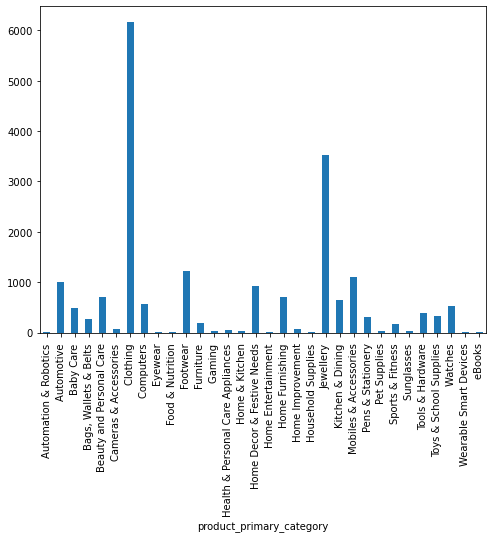

In [56]:
#plotting a graph using matplotlib library with x-axis=categories and y-axis=thier relative count
fig = plt.figure(figsize=(8,6))
flipkart.groupby('product_primary_category').description.count().plot.bar(ylim=0)
plt.show()

In [60]:
flipkart=flipkart[0:5000]
#reducing the size of data due to memory issues as the process as well as my system was getting really slow

In [61]:
#as input ="description" and output ="product primary category" so only keeping that in dataset and also adding category id
from io import StringIO
col = ['product_primary_category', 'description']
flipkart = flipkart[col]
flipkart = flipkart[pd.notnull(flipkart['description'])]
flipkart.columns = ['product_primary_category', 'description']
flipkart['category_id'] = flipkart['product_primary_category'].factorize()[0]
category_id_df = flipkart[['product_primary_category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product_primary_category']].values)
flipkart.head()

,product_primary_category,description,category_id
0,Clothing,Key Features of Alisha Solid Women's Cycling S...,0
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,2
3,Clothing,Key Features of Alisha Solid Women's Cycling S...,0
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...,3


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')
features = tfidf.fit_transform(flipkart.description).toarray()
labels = flipkart.category_id
features.shape

(5000, 8054)

**Splitting the data into Train and Test and applying it to Models**

In [63]:
"""applying Tdfidf transformer as it is capable of maintaining
the attention mechanism while processing sequences in parallel,
with basic Multinomial Naive Bayes
as this problem is multiclass classification and for this model
one feature ideally has to be 1D array which is not possible without transformer"""
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(flipkart['description'],
                                                    flipkart['product_primary_category'],
                                                    random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [64]:
#testing the results of model
print(clf.predict(count_vect.transform(["Key Features of Carrel Printed Women's Fabric: SwimLycra Brand Color: Black, White,Carrel Printed Women's Price: Rs. 910 Max-coverage swimwear collection from CARREL BRAND, Brighten up your swim routine with this best fitting. This swimming costume from the house of Carrel is made of imported swim lycra fabric and comes in Black & White Colour. It has to be washed separately and dry in shade. Attractive & classy caressing the water. This swimwear provides excellent protection and Chlorine resistance. fast drying combined with flatlock stitching gives an unmatched comfort and helps you to that performance you have been striving for. This swimwear with its comfort and style is your perfect companion at any pool, beach or water activity. Time for you to do your own thing and Go With The Flow. This Swimwear Lightly padded, for modesty and support. This Product Support To This Size : L, XL, XXL, 3XL,4XL.,Specifications of Carrel Printed Women's Top Details Neck Round Neck Swimsuit Details Fabric SwimLycra Type Swim-dress General Details Pattern Printed Ideal For Women's Occasion Sports Fabric Care Wash with Similar Colors, Use Detergent for Colors In the Box 1 Swimware"])))

['Clothing ']


In [65]:
flipkart[flipkart['description'] == "Key Features of Carrel Printed Women's Fabric: SwimLycra Brand Color: Black, White,Carrel Printed Women's Price: Rs. 910 Max-coverage swimwear collection from CARREL BRAND, Brighten up your swim routine with this best fitting. This swimming costume from the house of Carrel is made of imported swim lycra fabric and comes in Black & White Colour. It has to be washed separately and dry in shade. Attractive & classy caressing the water. This swimwear provides excellent protection and Chlorine resistance. fast drying combined with flatlock stitching gives an unmatched comfort and helps you to that performance you have been striving for. This swimwear with its comfort and style is your perfect companion at any pool, beach or water activity. Time for you to do your own thing and Go With The Flow. This Swimwear Lightly padded, for modesty and support. This Product Support To This Size : L, XL, XXL, 3XL,4XL.,Specifications of Carrel Printed Women's Top Details Neck Round Neck Swimsuit Details Fabric SwimLycra Type Swim-dress General Details Pattern Printed Ideal For Women's Occasion Sports Fabric Care Wash with Similar Colors, Use Detergent for Colors In the Box 1 Swimware"]

,product_primary_category,description,category_id


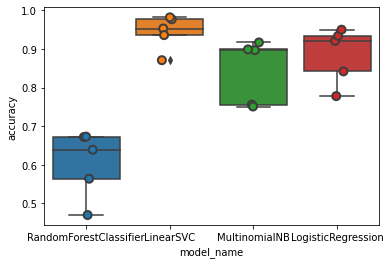

In [66]:
"""testing the performance metrics of 4 ML algorithms 
.ie.Logistic Regression,(Multinomial) Naive Bayes, Linear Support Vector Machine 
& Random Forest and comparing them"""
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [67]:
#resultant accuracy of each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.9438
LogisticRegression        0.8850
MultinomialNB             0.8440
RandomForestClassifier    0.6036
Name: accuracy, dtype: float64

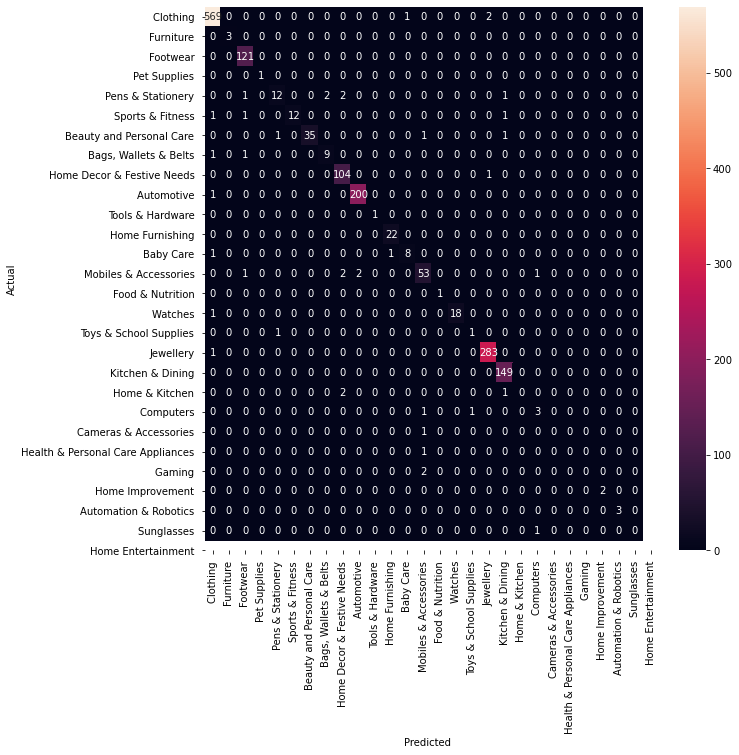

In [68]:
#now applying LinearSVM model which is ideal for binary class but still can be used here
model = LinearSVC()
#spliting the data into 67% training and 33% testing data which is important to avoid overfitting or underfitting
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features,
                                                                                 labels, df.index, 
                                                                                 test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.product_primary_category.values, yticklabels=category_id_df.product_primary_category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [95]:
flipkart['product_primary_category'].unique()

array(['Clothing ', 'Furniture ', 'Footwear ', 'Pet Supplies ',
       'Pens & Stationery ', 'Sports & Fitness ',
       'Beauty and Personal Care ', 'Bags, Wallets & Belts ',
       'Home Decor & Festive Needs ', 'Automotive ', 'Tools & Hardware ',
       'Home Furnishing ', 'Baby Care ', 'Mobiles & Accessories ',
       'Food & Nutrition ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Home & Kitchen ', 'Computers ',
       'Cameras & Accessories ', 'Health & Personal Care Appliances ',
       'Gaming ', 'Home Improvement ', 'Automation & Robotics ',
       'Sunglasses ', 'Home Entertainment '], dtype=object)

In [98]:
"""printing out the classification report for each class,
had to manually label it as it kept throwing "incompatible class size" error"""
from sklearn import metrics
target_names = ['Clothing ', 'Furniture ', 'Footwear ', 'Pet Supplies ',
                'Pens & Stationery ', 'Sports & Fitness ',
                'Beauty and Personal Care ', 'Bags, Wallets & Belts ',
                'Home Decor & Festive Needs ', 'Automotive ', 'Tools & Hardware ',
                'Home Furnishing ', 'Baby Care ', 'Mobiles & Accessories ',
                'Food & Nutrition ', 'Watches ', 'Toys & School Supplies ',
                'Jewellery ', 'Kitchen & Dining ', 'Home & Kitchen ', 'Computers ',
                'Cameras & Accessories ', 'Health & Personal Care Appliances ',
                'Gaming ', 'Home Improvement ', 'Automation & Robotics ',
                'Sunglasses ']
print(metrics.classification_report(y_test, y_pred,
                                    target_names=target_names))

                                    precision    recall  f1-score   support

                         Clothing        0.99      0.99      0.99       572
                        Furniture        1.00      1.00      1.00         3
                         Footwear        0.97      1.00      0.98       121
                     Pet Supplies        1.00      1.00      1.00         1
                Pens & Stationery        0.86      0.67      0.75        18
                 Sports & Fitness        1.00      0.80      0.89        15
         Beauty and Personal Care        1.00      0.92      0.96        38
            Bags, Wallets & Belts        0.82      0.82      0.82        11
       Home Decor & Festive Needs        0.95      0.99      0.97       105
                       Automotive        0.99      1.00      0.99       201
                 Tools & Hardware        1.00      1.00      1.00         1
                  Home Furnishing        0.96      1.00      0.98        22
           

In [159]:
category=flipkart['product_primary_category'].unique().tolist()
len(category)

28

In [166]:
nlp = spacy.load('en_core_web_lg')

In [175]:
#trying to perform embedding as its good when trying to reduce dimentionalty of input data
embeddings_index= np.zeros((len(TfidfVectorizer.get_feature_names ()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items (): 
    try:
        embedding = nlp.vocab[word].vector 
        embeddings_index[ idx] = embedding
    except:
        pass

TypeError: get_feature_names() missing 1 required positional argument: 'self'

In [160]:
random.shuffle(category)
category_train=[category[i] for i in range(round(0.9*len(category)))]

train_df = flipkart[flipkart['product_primary_category'].isin(category_train)]
validation_df=flipkart[~flipkart['product_primary_category'].isin(category_train)]

In [161]:
"""trying to use google word2Vectorizer as it is fast and 
effective but due to recent gensim 4.0 upgradation 
lots of function and properties were changed so facing 
errors but keeping this block of code for fute references and work"""
description_train=[]
for i in tqdm(category_train):
    temp=train_df[train_df['product_primary_category']==i]['pid'].tolist()
    description_train.append(temp)

  0%|          | 0/25 [00:00<?, ?it/s]


KeyError: 'pid'

In [ ]:
description_val=[]
for i in tqdm(validation_df['product_primary_category'].unique()):
    temp=validation_df[validation_df["product_primary_category"]==i]['pid'].tolist()
    description_val.append(temp)

In [ ]:
 
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(description_train, progress_per=200)

In [ ]:
model.train(description_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

In [ ]:
X = model[model.wv.vocab]

X.shape